In [12]:
import pandas as pd
train_data = pd.read_csv("tweet_eval_train.csv")
val_data   = pd.read_csv("tweet_eval_validation.csv")
test_data  = pd.read_csv("tweet_eval_test.csv")
data.sample(20)

,text,label,clean_text
5052,Where the fuck are all the celebrities like Ga...,0,wherethefuckareallthecelebritieslikegagaandjas...
44049,Former Gov. Rick Perry said Wednesday financia...,2,formergov.rickperrysaidwednesdayfinancialwoesw...
5996,"""I had a bad feeling the 1st time I heard """"wi...",0,"""ihadabadfeelingthe1sttimeiheard""""willbegreete..."
45127,Crazy Monday: Michelle Obama juggles her roles...,1,crazymonday:michelleobamajugglesherroleswithpo...
5744,shit that pisses me off: Men that complain abo...,0,shitthatpissesmeoff:menthatcomplainaboutintern...
12215,Chess game today... If anyone is in Dumbo toda...,1,chessgametoday...ifanyoneisindumbotodayatthebr...
5948,@user we put a 2nd team out and get beat and y...,1,weputa2ndteamoutandgetbeatandyougo#rafa...beha...
3907,with the Wikileaks releases yesterday\u002c it...,2,withthewikileaksreleasesyesterday\u002cit\u201...
40287,"""Lloris, Walker, Alderwiereld, Vertonghen, Dav...",1,"""lloris,walker,alderwiereld,vertonghen,davies,..."
30640,The Empire State Building is not lit up today....,0,theempirestatebuildingisnotlituptoday.thispict...


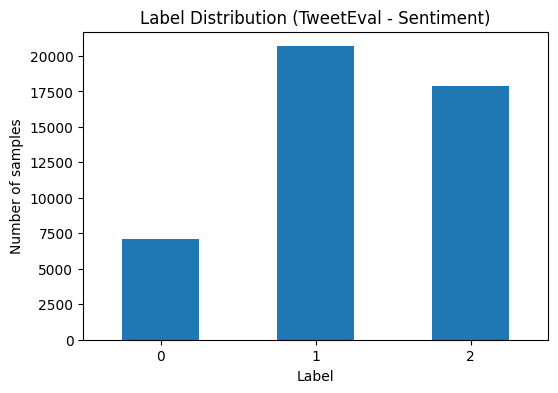

In [2]:
import matplotlib.pyplot as plt
label_counts = data["label"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(6,4))
label_counts.plot(kind="bar")
plt.xlabel("Label")
plt.ylabel("Number of samples")
plt.title("Label Distribution (TweetEval - Sentiment)")
plt.xticks(rotation=0)
plt.show()

In [13]:
int(train_data.duplicated().sum())

26

In [14]:
train_data=train_data.drop_duplicates()

In [16]:
int(train_data.duplicated().sum())

0

In [17]:
train_data["label"].describe()

count    45589.000000
mean         1.235781
std          0.700947
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: label, dtype: float64

In [18]:
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}

In [22]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"https\s+|www\s+","",text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"\s+", "", text).strip()
    return text
    
train_data["clean_text"] = train_data["text"].apply(clean_text)
val_data["clean_text"]   = val_data["text"].apply(clean_text)
test_data["clean_text"]  = test_data["text"].apply(clean_text)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,2),
    min_df=3
)

X_train = tfidf.fit_transform(train_data["clean_text"])
X_val   = tfidf.transform(val_data["clean_text"])
X_test  = tfidf.transform(test_data["clean_text"])

In [27]:
y_train = train_data["label"]
y_val = val_data["label"]
y_test = test_data["label"]

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"   # IMPORTANT
)

model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [29]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, target_names=["Negative","Neutral","Positive"]))

              precision    recall  f1-score   support

    Negative       0.29      0.21      0.24       312
     Neutral       0.48      0.78      0.59       869
    Positive       0.61      0.27      0.37       819

    accuracy                           0.48      2000
   macro avg       0.46      0.42      0.40      2000
weighted avg       0.50      0.48      0.45      2000



In [30]:
import joblib
joblib.dump(model, "baseline_logreg.pkl")
joblib.dump(tfidf, "tfidf.pkl")


['tfidf.pkl']

In [32]:
val_data["pred"] = y_pred
errors = val_data[val_data["label"] != val_data["pred"]]
errors.sample(20)


,text,label,clean_text,pred
1240,"""#BritishBuddhu if Rahul Gandhi is really a Br...",0,"""#britishbuddhuifrahulgandhiisreallyabritishci...",1
29,"@user told you because you said """"Generally 15...",2,"toldyoubecauseyousaid""""generally15augustcomesn...",1
1502,Here\u2019s what Dixie is saying about Stansbu...,1,here\u2019swhatdixieissayingaboutstansbury.bes...,2
772,"Serena won, but big sister Venus gave her the ...",2,"serenawon,butbigsistervenusgavehertheflux!cong...",1
1722,"""Just found out the craziest things about DRos...",0,"""justfoundoutthecraziestthingsaboutdrose'sknee...",1
1702,I seriously might just take the fam to Disneyl...,2,iseriouslymightjusttakethefamtodisneylandright...,0
1835,"""\""""""""@nodoubt: Tune into @user tomorrow for a...",0,"""\"""""""":tuneintotomorrowforaspecial#pushandshov...",1
1839,Very bad idea 2 allow the dead body of Yakub t...,0,verybadidea2allowthedeadbodyofyakubtocometomum...,1
822,I just realized that I'm seeing Ed Sheeran in ...,2,ijustrealizedthati'mseeingedsheeraninconcerton...,1
339,"""Watched a movie yesterday #The70's on #OVTV a...",2,"""watchedamovieyesterday#the70'son#ovtvandwaspl...",1
